<a href="https://colab.research.google.com/github/pankajr141/Kaggle-ML/blob/master/ubisoft/ubisoft_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount(r'/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import sys
import cv2
import copy
import random
import matplotlib.pyplot as plt

In [2]:
train_dir = '/content/drive/My Drive/datasets/ubisoft/Train'
train_files = [os.path.join(train_dir, x) for x in os.listdir(train_dir)]
train_files

['/content/drive/My Drive/datasets/ubisoft/Train/Altair 1.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Altair 2.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Altair 3.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 1.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Altair 4.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Altair 5.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 2.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 3.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 4.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 5.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 8.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 7.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/cropped4.JPG',
 '/content/drive/My Drive/datasets/ubisoft/Train/cropped1.JPG',
 '/content/drive/My Drive/datasets/ubisoft/Train/cropped2.JPG',
 '/content/drive/My Drive/datasets/ubiso

In [3]:
import json
from shapely.geometry import Polygon

def create_positive_samples():
  outputdir = '/content/drive/My Drive/datasets/ubisoft/cropped/positive'
  for i in range(150):
    train_file = random.choice(train_files)
    jsonfile = os.path.join('/content/drive/My Drive/datasets/ubisoft/Annotations/Train.json')
    annotations = list(json.load(open(jsonfile)).values()) # don't need the dict keys
    annotation = [x for x in annotations if x['filename'] == os.path.basename(train_file)]
    print(annotation[0]['regions'])
    keys = annotation[0]['regions'].keys()
    print(keys)
    buf = 64
    img = cv2.imread(train_file)
    for key in keys:
        x = annotation[0]['regions'][key]['shape_attributes']['all_points_x']
        y = annotation[0]['regions'][key]['shape_attributes']['all_points_y']

        x_min, x_max = np.min(x) - int(buf), np.max(x)
        y_min, y_max = np.min(y) , np.max(y) + int(buf)

        pts1 = np.array(list(zip(x,y)))


        x, y = random.choice(range(x_min, x_max)), random.choice(range(y_min, y_max))
        crop_img = img[y-buf:y, x:x+buf]
        pts2 = np.array([(x, y), (x, y-buf), (x+buf, y-buf), (x+ buf, y), (x, y)])

        p1 = Polygon(pts1)
        p2 = Polygon(pts2)
        if p1.intersects(p2):
            name = os.path.join(outputdir, "random_%d.jpg" % random.choice(range(1000000)))
            cv2.imwrite(name, crop_img)

  #       plt.imshow(crop_img)
  #       plt.show()

  #       cv2.polylines(img,[pts1], True, (255, 0, 0), 3)
  #       cv2.polylines(img,[pts2], True, (255, 0, 0), 3)


  #       plt.imshow(img)
  #       plt.show()
  
'''Uncomment to generate positive samples in Google drive '''
# create_positive_samples()

'Uncomment to generate positive samples in Google drive '

In [0]:
import random
def create_negative_samples(train_files, outputdir):
    filepath = random.choice(train_files)
    img = cv2.imread(filepath)
    x, y = random.choice(range(img.shape[1])), random.choice(range(img.shape[0]))
    crop_img = img[y:y+64, x:x+64]
    name = os.path.join(outputdir, "random_%d.jpg" % random.choice(range(1000000)))
    cv2.imwrite(name, crop_img)

outputdir = '/content/drive/My Drive/datasets/ubisoft/cropped/negative'
if not os.path.exists(outputdir):
  os.makedirs(outputdir)

''' Uncomment to Generate Negative samples in google drive '''
# for i in range(40):
#   create_negative_samples(train_files, outputdir)
  

### Create Data Frame with positive and negative samples

In [20]:
import numpy as np
import pandas as pd

posdir = '/content/drive/My Drive/datasets/ubisoft/cropped/positive'
negdir = '/content/drive/My Drive/datasets/ubisoft/cropped/negative'

dataset = []
pospaths = [os.path.join(posdir, x) for x in os.listdir(posdir)]
for pospath in pospaths:
  img = cv2.imread(pospath)
  img = cv2.resize(img, (32, 32))
  img = img.reshape(32*32*3)
  dataset.append(img)
df_pos = pd.DataFrame(dataset)
df_pos['label'] = 1

dataset = []
negpaths = [os.path.join(negdir, x) for x in os.listdir(negdir)]
for megpath in negpaths:
  img = cv2.imread(megpath)
  img = cv2.resize(img, (32, 32))
  img = img.reshape(32*32*3)
  dataset.append(img)
df_neg = pd.DataFrame(dataset)
df_neg['label'] = 0

df = pd.concat([df_pos, df_neg], axis=0)
print(df['label'].value_counts())

0    188
1    179
Name: label, dtype: int64


In [21]:
def getTrainHoldoutSplit(df, dfLabel, holdoutSize=0.20):
    from sklearn import model_selection 
    dfHoldOut = None
    dfHoldOutLabel = None

    cv_pre = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=holdoutSize, random_state=1)
    for train_index, test_index in cv_pre.split(df, dfLabel):
        y_train, y_test = dfLabel[train_index], dfLabel[test_index]
        x_train, x_test = df.iloc[train_index], df.iloc[test_index]
        df, dfLabel = x_train, y_train
        dfHoldOut, dfHoldOutLabel = x_test, y_test

    print("==================== Data Set ==================================")
    print("Holdout Set => ", dfHoldOut.shape)
    print("Train Set => ", df.shape)
    print("==================== Data Set ==================================")
    return df, dfLabel, dfHoldOut, dfHoldOutLabel
  
df, _, dfVal, _ = getTrainHoldoutSplit(df, df['label'], holdoutSize=0.15)
dfLabel = df['label']
dfValLabel = dfVal['label']
df.drop(['label'], inplace=True, axis=1)
dfVal.drop(['label'], inplace=True, axis=1)

print(dfLabel.value_counts())

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


==================== Data Set ==================================
Holdout Set =>  (56, 3073)
Train Set =>  (311, 3073)
==================== Data Set ==================================
0    159
1    152
Name: label, dtype: int64


In [0]:
from sklearn import svm
from sklearn import metrics

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, max_depth=3, random_state=0)
# clf = svm.LinearSVC(C=10)
clf.fit(df, dfLabel)

print("Train ACC:", metrics.accuracy_score(dfLabel, clf.predict(df)))
print("Val Acc:", metrics.accuracy_score(dfValLabel, clf.predict(dfVal)))

Train ACC: 0.9292604501607717
Val Acc: 0.7678571428571429


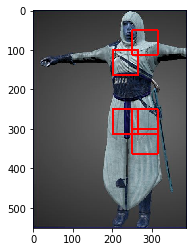

In [39]:
# read the image and define the stepSize and window size 
# (width,height)
image = cv2.imread(train_files[12]) # your image path
tmp = image # for drawing a rectangle
stepSize = 50

window_sizes = [64]

for window_size in window_sizes:
  (w_width, w_height) = (window_size, window_size) # window size
  for x in range(0, image.shape[1] - w_width , stepSize):
     for y in range(0, image.shape[0] - w_height, stepSize):
        try:
          window = image[x:x + w_width, y:y + w_height, :]
          window = cv2.resize(window, (32, 32))
          window_flat = window.reshape(-1, 32*32*3)
          if clf.predict_proba(window_flat)[0][1] > 0.8:
#               cv2.rectangle(tmp, (x, y), (x + w_width, y + w_height), (255, 0, 0), 3) # draw rectangle on image
              cv2.rectangle(tmp, (y, x), (y + w_height, x + w_width), (255, 0, 0), 3) # draw rectangle on image
#               plt.imshow(window)
#               plt.show()
        except Exception as err:
          pass
# show all windows
plt.imshow(np.array(tmp).astype('uint8'))
plt.show()